# Appendix:

New input based on 90 minutes time slot

In [41]:
ub = [0,	0,	0,	0,	1,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,	1,\
      0,	0,	0,	0,	0,	1,	0,	1,	1,	1,	1,	1,	0,	0,	0,	0,	0,	1,	1,	1,	1,	1,	1,	1,
1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	1,	1,	1,	0,	0,	0,	1,	1,	1,	0,	0,	1,	1,	1,
0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	1,	1,	1,
0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	1,	1,	0,
1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,
0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,
1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,
1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,
0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,
0,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,	1,	0,	0,	0,	0,	0,
0,	0,	0,	0,	0,	0,	0,	1,	1,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]

Construct the model

In [43]:
from gurobipy import *
m = Model()

# Create a list of tuples
variables = [(i,j) for i in range(12) for j in range(24)]

# Only add variables that can be non-zero
# For example, a_(1,1) = 0, then we don't need to add x_(1,1)
# into the model since it has to be 0
new_ub = []
for var in variables:
    if(ub[var[0]*24+var[1]] == 1):
        new_ub.append(var)
v = m.addVars(new_ub, vtype=GRB.BINARY, name='EmployeesStarting')

Define some methods

In [44]:
# calculate the total working hours for a single tutor
# Day shift is 1.5 hours, night shift is 2 hours.
def totalHours(tutor):
    total = 0
    for shift in range(24):
        if ub[ 24*(tutor) + shift ] == 1:   # Only check the variables in the model
            total += v[tutor,shift]*1.5
            if shift+1 % 6 == 0:
                total += 0.5*v[tutor,shift]
    return total

In [45]:
# calculate the total working hours on Monday for a single tutor
# Day shift is 1.5 hours, night shift is 2 hours.
def totalHours1(tutor):
    total = 0
    for shift in range(6):
        if ub[ 24*(tutor) + shift ] == 1:   # Only check the variables in the model
            total += v[tutor,shift]*1.5
            if shift==5:
                total += 0.5*v[tutor,shift]
    return total
# calculate the total working hours on Tuesday for a single tutor
# Day shift is 1.5 hours, night shift is 2 hours.
def totalHours2(tutor):
    total = 0
    for shift in range(6, 12):
        if ub[ 24*(tutor) + shift ] == 1:   # Only check the variables in the model
            total += v[tutor,shift]*1.5
            if shift==11:
                total += 0.5*v[tutor,shift]
    return total
# calculate the total working hours on Wednesday for a single tutor
# Day shift is 1.5 hours, night shift is 2 hours.
def totalHours3(tutor):
    total = 0
    for shift in range(12, 18):
        if ub[ 24*(tutor) + shift ] == 1:   # Only check the variables in the model
            total += v[tutor,shift]*1.5
            if shift==17:
                total += 0.5*v[tutor,shift]
    return total
# calculate the total working hours on Thursday for a single tutor
# Day shift is 1.5 hours, night shift is 2 hours.
def totalHours4(tutor):
    total = 0
    for shift in range(18, 24):
        if ub[ 24*(tutor) + shift ] == 1:   # Only check the variables in the model
            total += v[tutor,shift]*1.5
            if shift== 23:
                total += 0.5*v[tutor,shift]
    return total

In [46]:
# calculate the number of tutors worked in every shift
def numTutor(shift):           
    total = 0
    for tutor in range(12):
        if ub[tutor*24 + shift] == 1:
            total += v[tutor, shift]
    return total

Adding Constraints into the model

In [47]:
for emp in range(12):                # every tutor works no more than 4 hours per week
    m.addConstr(totalHours(emp) <= 4)
    m.addConstr(totalHours1(emp) <= 3)
    m.addConstr(totalHours2(emp) <= 3)
    m.addConstr(totalHours3(emp) <= 3)
    m.addConstr(totalHours4(emp) <= 3)  
for shf in range(24):               # every shift has exactly 1 tutor
    m.addConstr(numTutor(shf) == 1)
m.update()

Objective funtion:

In [48]:
# Total working hour is 38
# There are 12 tutors
# Average working hour is 38/12
bar_T = 38/12
# Objective funtion
# Equivalent to minimize the variance of total working hours
var = 0
for i in range(12):
    var += (totalHours(i) - bar_T)*(totalHours(i) - bar_T)
m.setObjective(var, GRB.MINIMIZE)

In [49]:
m.optimize()

Optimize a model with 84 rows, 82 columns and 246 nonzeros
Model has 447 quadratic objective terms
Variable types: 0 continuous, 82 integer (82 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+00]
  Objective range  [1e+01, 1e+01]
  QObjective range [5e+00, 9e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 0.3333333
Presolve removed 41 rows and 10 columns
Presolve time: 0.03s
Presolved: 379 rows, 408 columns, 1200 nonzeros
Variable types: 0 continuous, 408 integer (408 binary)

Root relaxation: objective -2.666667e+01, 47 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -26.66667    0   18    0.33333  -26.66667  8100%     -    0s
     0     0  -19.91667    0   25    0.33333  -19.91667  6075%     -    0s
     0     0  -15.41667    0   30    0.33333  -15.41667  4725%     -   

In [50]:
for var in new_ub:
    if v[var].x == 1:
        print('x_{%d, %d}=%d' % (var[0],var[1],v[var].x))

x_{0, 16}=1
x_{0, 20}=1
x_{1, 19}=1
x_{1, 21}=1
x_{2, 4}=1
x_{2, 9}=1
x_{3, 5}=1
x_{3, 22}=1
x_{4, 2}=1
x_{4, 14}=1
x_{5, 10}=1
x_{5, 23}=1
x_{6, 11}=1
x_{6, 17}=1
x_{7, 1}=1
x_{7, 13}=1
x_{8, 0}=1
x_{8, 12}=1
x_{9, 3}=1
x_{9, 15}=1
x_{10, 6}=1
x_{10, 18}=1
x_{11, 7}=1
x_{11, 8}=1


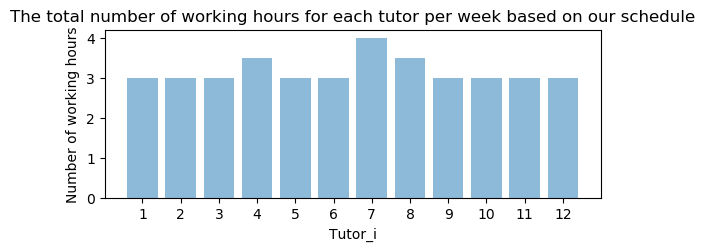

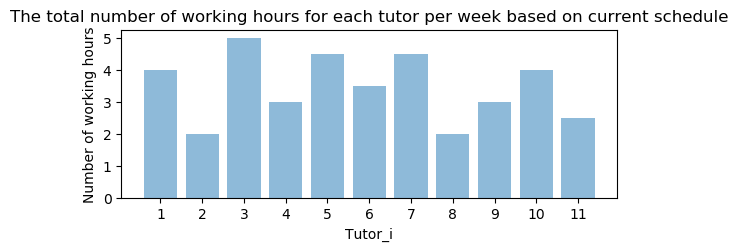

In [51]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import numpy as np
a = [3, 3, 3, 3.5, 3, 3, 4, 3.5, 3, 3, 3, 3]
b = [4, 2, 5, 3, 4.5, 3.5, 4.5, 2, 3, 4, 2.5]
plt.subplot(2,1,1)
objects = list(range(1, 13))
y_pos = np.arange(len(objects))
performance = [3, 3, 3, 3.5, 3, 3, 4, 3.5, 3, 3, 3, 3]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of working hours')
plt.xlabel('Tutor_i')
plt.title('The total number of working hours for each tutor per week based on our schedule')
plt.show()
plt.subplot(2,1,2)
objects = list(range(1, 12))
y_pos = np.arange(len(objects))
performance = b
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of working hours')
plt.xlabel('Tutor_i')
plt.title('The total number of working hours for each tutor per week based on current schedule')
plt.show()